In [1]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D
from keras.utils import to_categorical
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout
import matplotlib.pyplot as plt
import keras
from keras import regularizers

In [0]:
(x,y),(x_valid,y_valid) = fashion_mnist.load_data()

In [0]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y)

In [0]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_valid = x_valid.reshape(x_valid.shape[0],28,28,1)

y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)
y_valid = to_categorical(y_valid,num_classes=10)


In [6]:
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(64,kernel_size=(3,3),strides=(1,1),padding='same',input_shape = (28,28,1),activation='relu',
                 kernel_initializer=keras.initializers.glorot_normal(seed=None),
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(MaxPool2D(pool_size=(2,2)))




model.add(Conv2D(128,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Conv2D(128,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(256,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Conv2D(256,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))


model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10,activation='softmax'))
model.summary()







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         

In [7]:
#compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [8]:


history = model.fit(x_train, y_train,
          batch_size=256,
          epochs=30,
          verbose=1,
          validation_data=(x_valid, y_valid),
          )


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 45000 samples, validate on 10000 samples
Epoch 1/30
45000/45000 [==============================] - 18s 403us/step - loss: 0.8971 - acc: 0.7112 - val_loss: 0.6241 - val_acc: 0.8004
Epoch 2/30
45000/45000 [==============================] - 14s 321us/step - loss: 0.4620 - acc: 0.8535 - val_loss: 0.4271 - val_acc: 0.8657
Epoch 3/30
45000/45000 [==============================] - 14s 320us/step - loss: 0.3881 - acc: 0.8824 - val_loss: 0.4053 - val_acc: 0.8698
Epoch 4/30
45000/45000 [==============================] - 14s 322us/step - loss: 0.3484 - acc: 0.8962 - val_loss: 0.3582 - val_acc: 0.9001
Epoch 5/30
45000/45000 [==============================] - 14s 320us/step - loss: 0.3255 - acc: 0.9060 - val_loss: 0.3202 - val_acc: 0.9080
Epoch 6/30
45000/45000 [==============================] - 14s 321us/step - loss: 0.3067 - acc: 0.9130 - val_loss: 0.3008 - val_acc: 0.9173
Epoch 7/30
45000/45000

In [0]:
#history = model.fit(x=x_train,y=y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),
 #     shuffle=True)

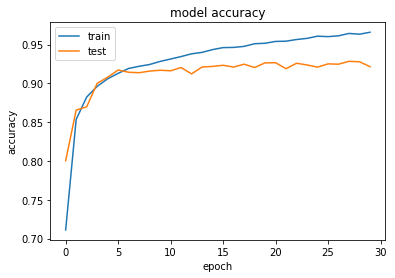

In [10]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



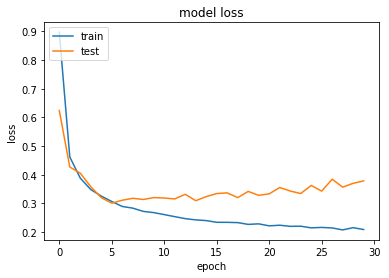

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
model.evaluate(x=x_test,y=y_test)

15000/15000 [==============================] - 3s 233us/step


[0.3481072598536809, 0.929]

In [0]:
result = model.predict(x=x_test)

In [0]:
import numpy as np
y_pred = np.rint(result)

In [0]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
y_pred_ = np.argmax(y_pred,axis=1)
y_actual = np.argmax(y_test,axis=1)
array = confusion_matrix(y_actual,y_pred_)

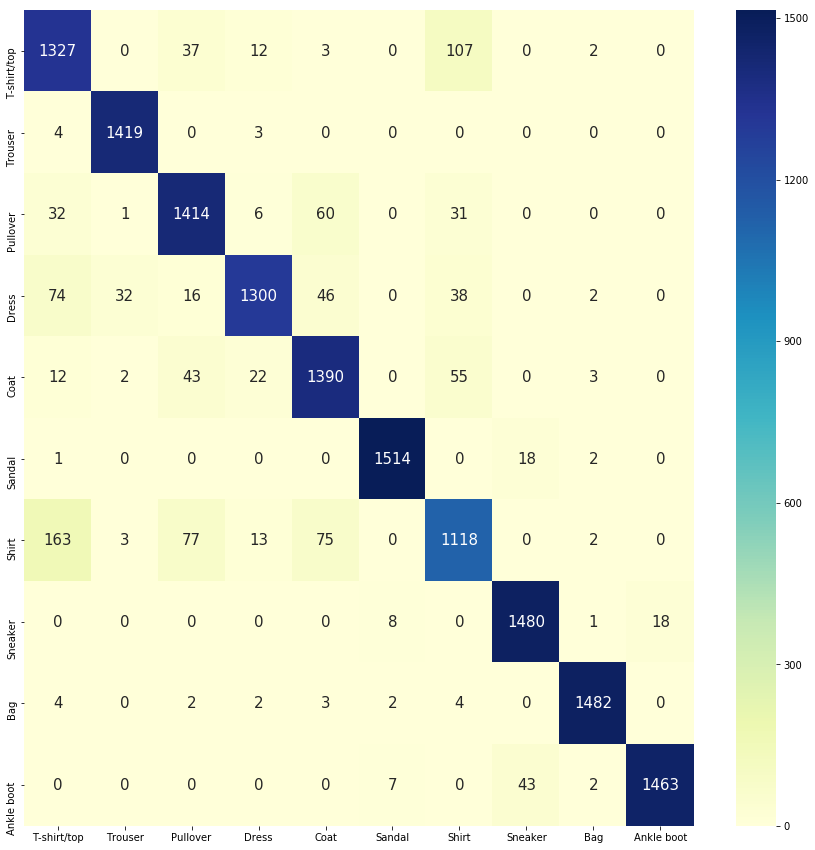

In [21]:
import pandas as pd
import seaborn as sn
clothing = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}
df_cm = pd.DataFrame(array, clothing.values(),
                  clothing.values())
plt.subplots(figsize=(15,15))
sn.heatmap(df_cm, annot=True,annot_kws={"size": 15},cmap="YlGnBu",fmt='g')# font size

In [0]:
model.evaluate(x_test,y_test)

In [0]:
clothing.values()

In [0]:
fig, axes = plt.subplots(4, 4, figsize = (5,5))
for row in axes:
    for axe in row:
        index = np.random.randint(45000)
        img = x_train[index].reshape(28,28)
        cloths = np.argmax(y_train[index])
        axe.imshow(img, cmap='gray')
        axe.set_title(clothing[cloths])
        axe.set_axis_off()

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
model.save_weights("/content/drive/My Drive/Colab Notebooks/fashion_model_1.h5")